# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

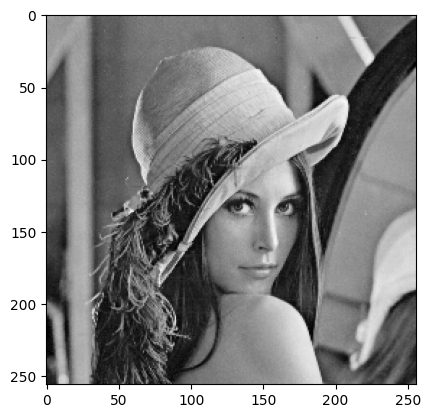

In [3]:
img_l = plt.imread("data/lena.png")
plt.imshow(img_l, "gray")

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [4]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0] < n or p[1] < n or p[0] > img.shape[0]-(n+1) or p[1] > img.shape[1]-(n+1): 
                result[p] = 0 #img[p]
        else:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img[tuple(numpy.add(tuple(numpy.subtract(p, (n, n))), q))]
            result[p] = (1/(size**2)) * neighborhood_sum
            
    return result

In [5]:
test = numpy.zeros((9, 9))
test[1, 1] = 4
test[2, 1] = 3
test[4, 4] = 9
test[6, 8] = 7

#print(test)
p = (6,8)
#q = (3,3)
#print(test[tuple(numpy.subtract(q,(1,1)))])
#print(test)
#for q in numpy.ndindex(3, 3):
#    print(test[tuple(numpy.subtract(q,(1, 1)))])
#print(test)
#print(test[tuple(numpy.add(tuple(numpy.subtract(p, (5, 5))), q))])
#print((5,-7) < (0,0))
print(test[p[0]])


[0. 0. 0. 0. 0. 0. 0. 0. 7.]


**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

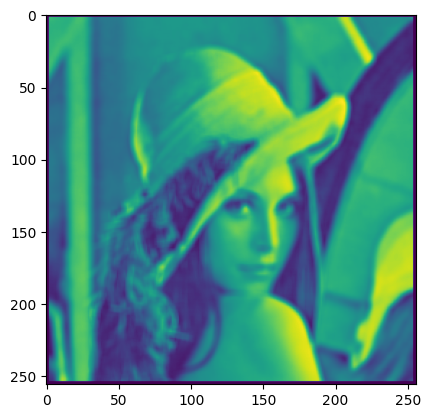

In [6]:
plt.imshow(meanfilter(img_l, 5))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [6]:
assert (meanfilter(img_l, 5) == plt.imread("data/lena_meanfilter5.png")).all()

AssertionError: 

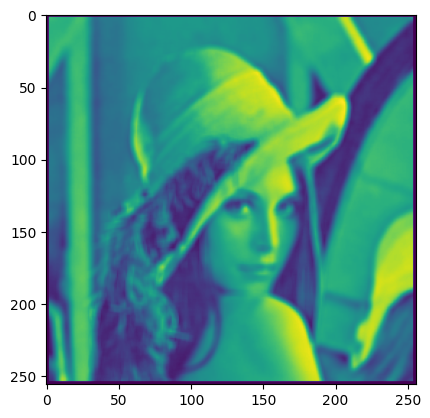

In [7]:
img_AAA = plt.imread("data/lena_meanfilter5.png")
plt.imshow(img_AAA)

In [7]:
assert (numpy.allclose(meanfilter(img_l, 5), plt.imread("data/lena_meanfilter5.png"), atol=1/255))

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [18]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0] < n or p[1] < n or p[0] > img.shape[0]-(n+1) or p[1] > img.shape[1]-(n+1): 
                result[p] = 0 #geht definitiv eleganter, da 0 nicht nötig wegen 0-Matrix
        else:
            neighborhood_list = list()
            for q in numpy.ndindex(size, size):
                neighborhood_list.append(img[tuple(numpy.add(tuple(numpy.subtract(p, (n, n))), q))])
            neighborhood_list.sort()
            result[p] = neighborhood_list[int(int((size**2)/2))+1]

    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

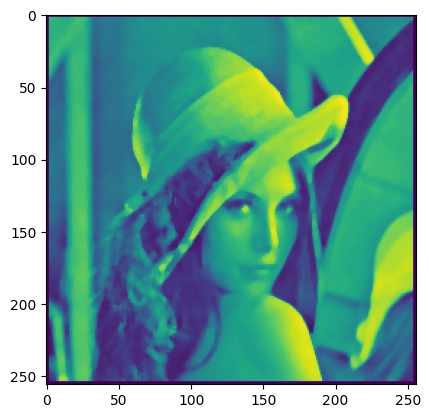

In [39]:
plt.imshow(medianfilter(img_l, 5))

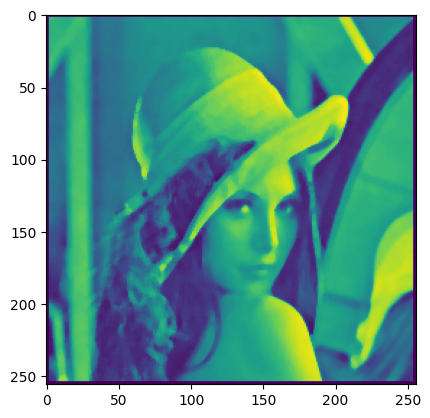

In [14]:
img_BBB = plt.imread("data/lena_medianfilter5.png")
plt.imshow(img_BBB)

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [15]:
assert (numpy.allclose(medianfilter(img_l, 5), img_BBB, atol=1/255))

AssertionError: 

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [16]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

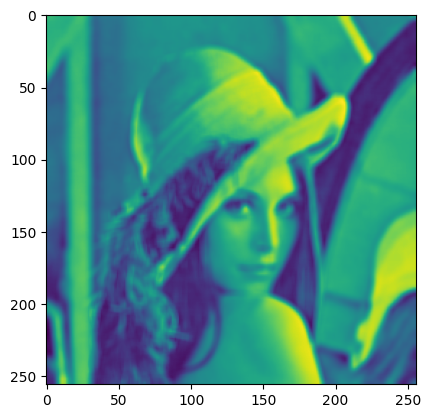

In [19]:
plt.imshow(scipy.ndimage.uniform_filter(img_l, 5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

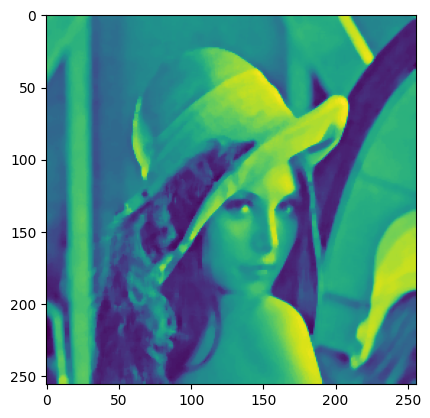

In [21]:
plt.imshow(scipy.ndimage.median_filter(img_l, 5))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

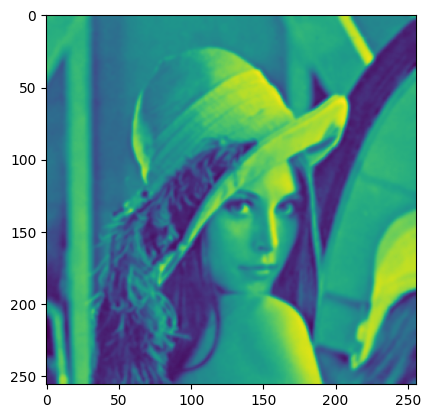

In [28]:
plt.imshow(scipy.ndimage.gaussian_filter(img_l, 1))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

## Not really!
Regarding these pre-implemented filters, the absence of a "black border" (undefined outline of zeros due to missing elements for the corresponding filter) can be noticed as the main difference between those and the self-implemented ones. Explanation is partially given (see brackets above), however we're not able to identify the reasons behind these differences without comparing the actuall codes (which aren't "available" for us).

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [19]:
"""
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0] < n or p[1] < n or p[0] > img.shape[0]-(n+1) or p[1] > img.shape[1]-(n+1): 
                result[p] = 0 #img[p]
        else:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img[tuple(numpy.add(tuple(numpy.subtract(p, (n, n))), q))]
            result[p] = (1/(size**2)) * neighborhood_sum
            
    return result
   """


def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2

    rows, cols = img.shape

    for i, j in numpy.ndindex(img.shape):
        if n <= i < rows - n and n <= j < cols - n:
           
            neighborhood_section = img[i - n : i + n + 1, j - n : j + n + 1]

            mean_value = neighborhood_section.mean()
            
            result[i, j] = mean_value

    return result


**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

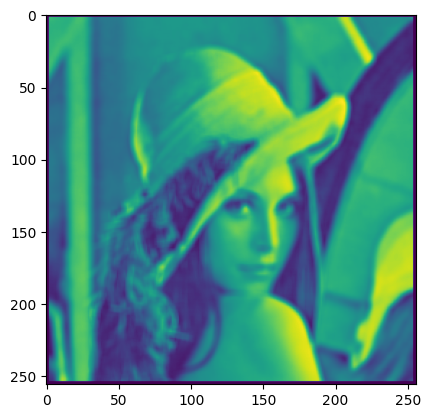

In [17]:
plt.imshow(fastfilter(img_l, 5))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [22]:
assert (numpy.allclose(meanfilter(img_l, 5), fastfilter(img_l, 5), atol=1/255))

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [26]:
%timeit fastfilter(img_l, 9)


524 ms ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit meanfilter(img_l, 9)

45.3 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

## WOW!

Obviously my own implementation takes way longer to filter the image than the given function. Reasons are probably the different intensities of the nestings of the loops... juckt mich aber auch garnicht so arg im Moment.